# British Airways 
## To Predict the Customer Buying Behaviour by biulding a Predictive model for customer bookings

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
pd.set_option('display.max_columns', None)

In [35]:
df = pd.read_csv(r"C:\Users\abhis\Downloads\customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


### Data Structure

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 


To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

### Data Manipulation And Exploratory data analysis

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [36]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [37]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [38]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [19]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

<AxesSubplot:>

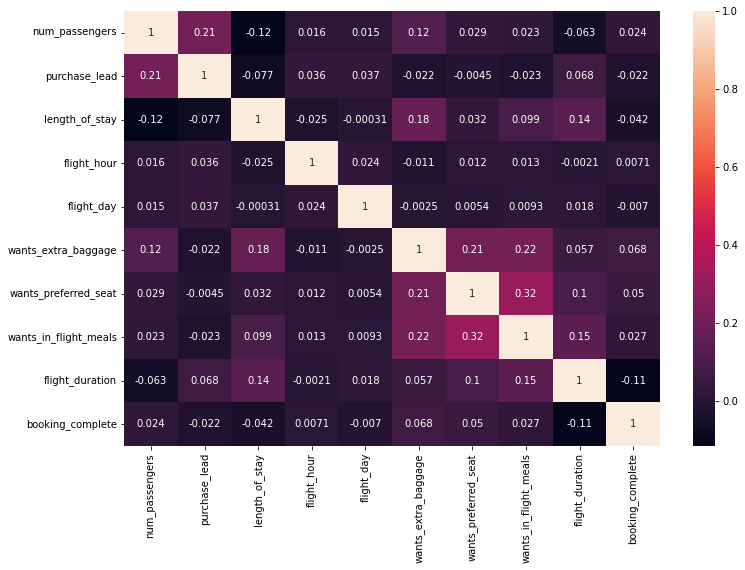

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,)

In [46]:
df_nw = pd.get_dummies(df, columns = ['sales_channel', 'trip_type','route','booking_origin'])
df_nw

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,route_AKLDEL,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,route_AKLPEK,route_AKLPVG,route_AKLTPE,route_AORICN,route_AORKIX,route_AORKTM,route_AORMEL,route_AORPER,route_AORPUS,route_BBIMEL,route_BBIOOL,route_BBIPER,route_BBISYD,route_BDOCTS,route_BDOCTU,route_BDOHGH,route_BDOICN,route_BDOIKA,route_BDOKIX,route_BDOMEL,route_BDOOOL,route_BDOPEK,route_BDOPER,route_BDOPUS,route_BDOPVG,route_BDOSYD,route_BDOTPE,route_BDOWUH,route_BDOXIY,route_BKICKG,route_BKICTS,route_BKICTU,route_BKIDEL,route_BKIHND,route_BKIICN,route_BKIKIX,route_BKIKTM,route_BKIMEL,route_BKIMRU,route_BKIOOL,route_BKIPEK,route_BKIPER,route_BKIPUS,route_BKIPVG,route_BKISYD,route_BKIXIY,route_BLRICN,route_BLRMEL,route_BLRPER,route_BLRSYD,route_BOMMEL,route_BOMOOL,route_BOMPER,route_BOMSYD,route_BTJJED,route_BTUCKG,route_BTUICN,route_BTUPER,route_BTUSYD,route_BTUWUH,route_BWNCKG,route_BWNDEL,route_BWNHGH,route_BWNIKA,route_BWNKTM,route_BWNMEL,route_BWNOOL,route_BWNPER,route_BWNSYD,route_BWNTPE,route_BWNWUH,route_CANDEL,route_CANIKA,route_CANMEL,route_CANMRU,route_CANOOL,route_CANPER,route_CANSYD,route_CCUMEL,route_CCUMRU,route_CCUOOL,route_CCUPER,route_CCUSYD,route_CCUTPE,route_CEBMEL,route_CEBOOL,route_CEBPER,route_CEBSYD,route_CGKCKG,route_CGKCTS,route_CGKCTU,route_CGKDEL,route_CGKHGH,route_CGKHND,route_CGKICN,route_CGKIKA,route_CGKJED,route_CGKKIX,route_CGKKTM,route_CGKMEL,route_CGKMRU,route_CGKOOL,route_CGKPEK,route_CGKPER,route_CGKPUS,route_CGKPVG,route_CGKSYD,route_CGKTPE,route_CGKWUH,route_CGKXIY,route_CKGCOK,route_CKGDPS,route_CKGHKT,route_CKGJHB,route_CKGKCH,route_CKGKNO,route_CKGLGK,route_CKGLOP,route_CKGMAA,route_CKGMEL,route_CKGMRU,route_CKGMYY,route_CKGOOL,route_CKGPEN,route_CKGPER,route_CKGPNH,route_CKGSBW,route_CKGSGN,route_CKGSIN,route_CKGSUB,route_CKGSYD,route_CKGTGG,route_CKGTRZ,route_CKGTWU,route_CMBCTS,route_CMBCTU,route_CMBHGH,route_CMBHND,route_CMBICN,route_CMBKIX,route_CMBMEL,route_CMBMRU,route_CMBOOL,route_CMBPEK,route_CMBPER,route_CMBPVG,route_CMBSYD,route_CMBWUH,route_CNXDEL,route_CNXHND,route_CNXICN,route_CNXKIX,route_CNXMEL,route_CNXOOL,route_CNXPEK,route_CNXPER,route_CNXPUS,route_CNXPVG,route_CNXSYD,route_CNXTPE,route_CNXXIY,route_COKCTS,route_COKCTU,route_COKHGH,route_COKICN,route_COKKIX,route_COKMEL,route_COKOOL,route_COKPER,route_COKPUS,route_COKSYD,route_COKTPE,route_COKWUH,route_CRKMEL,route_CRKOOL,route_CRKSYD,route_CSXMRU,route_CSXPER,route_CSXSYD,route_CTSDMK,route_CTSDPS,route_CTSHKT,route_CTSJHB,route_CTSJOG,route_CTSKBR,route_CTSKCH,route_CTSKNO,route_CTSLGK,route_CTSMEL,route_CTSMYY,route_CTSOOL,route_CTSPEN,route_CTSPER,route_CTSSBW,route_CTSSGN,route_CTSSIN,route_CTSSUB,route_CTSSYD,route_CTUDMK,route_CTUDPS,route_CTUHKT,route_CTUIKA,route_CTUJHB,route_CTUKBR,route_CTUKBV,route_CTUKCH,route_CTUKNO,route_CTULGK,route_CTULOP,route_CTUMAA,route_CTUMEL,route_CTUMLE,route_CTUMRU,route_CTUMYY,route_CTUOOL,route_CTUPEN,route_CTUPER,route_CTUREP,route_CTUSBW,route_CTUSGN,route_CTUSIN,route_CTUSRG,route_CTUSUB,route_CTUSYD,route_CTUTGG,route_CTUTRZ,route_CTUTWU,route_CTUURT,route_CXRMEL,route_DACHGH,route_DACHND,route_DACICN,route_DACKIX,route_DACMEL,route_DACMRU,route_DACOOL,route_DACPEK,route_DACPER,route_DACPUS,route_DACSYD,route_DACTPE,route_DADMEL,route_DADOOL,route_DADSYD,route_DELDMK,route_DELDPS,route_DELHKG,route_DELHKT,route_DELHND,route_DELJHB,route_DELJOG,route_DELKBR,route_DELKBV,route_DELKCH,route_DELKIX,route_DELKNO,route_DELLGK,route_DELMEL,route_DELMFM,route_DELMNL,route_DELMRU,route_DELMYY,route_DELOOL,route_DELPEN,route_DELPER,route_DELPNH,route_DELREP,route_DELRGN,route_DELSBW,route_DELSGN,route_DELSIN,route_DELSUB,route_DELSYD,route_DELSZX,route_DELURT,route_DMKHGH,route_DMKHND,route_DMKICN,route_DMKIKA,rou

In [48]:
y=df_nw['booking_complete']

In [49]:
x=df_nw.drop(['booking_complete'],axis=1)

### Building Model by using Sklearn 

* Train_Test_Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

* RandomForestClassifier

In [62]:
# train
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
# predict
predictions_rfc = rfc.predict(X_test)

* Model Evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Accuracy Checking
print('Model Accuracy:', accuracy_score(predictions_rfc, y_test))

In [64]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     12803
           1       0.49      0.14      0.21      2197

    accuracy                           0.85     15000
   macro avg       0.68      0.56      0.57     15000
weighted avg       0.81      0.85      0.82     15000



Text(33.0, 0.5, 'Target')

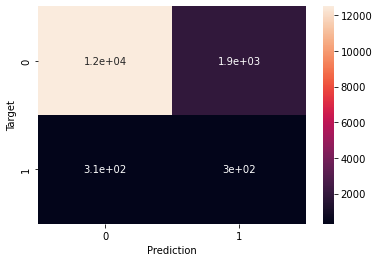

In [66]:
cf = confusion_matrix(predictions_rfc, y_test)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')